In [1]:
#coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import os
import pandas as pd
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

#import sys
#import plotly.offline as offline
#offline.init_notebook_mode()
path=r"F:\Diverse\statistics\Python_data_analysis\2017_data_news"
path=path
os.chdir(path)
#sys.path.append(r"F:\Diverse\statistics\Python_data_analysis\2017_data_news")

### 1.基础数据集导入

In [3]:
#read_file读取shp文件
polygon=gpd.read_file(r"border\administration_division_province_cn.shp")

In [5]:
polygon.head(2)

,geometry,gid,province
0,"POLYGON ((116.43194412 34.63910001000004, 116....",1,安徽省
1,"POLYGON ((113.56642296 22.21050798000003, 113....",2,澳门特别行政区


In [7]:
#将文件转化为相同坐标系统
gridCRS=polygon.crs
#polygon["geometry"]=polygon["geometry"].to_crs(crs=gridCRS)
print(gridCRS)

{'init': 'epsg:4326'}


In [11]:
#画静态图像
polygon.plot(color="b")

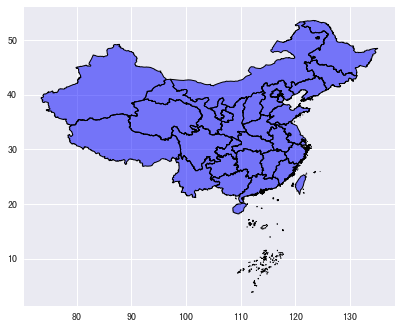

In [12]:
plt.show()

In [2]:
heritage=pd.read_excel(r"非物质文化遗产\非遗名录-汇总.xlsx",sheetname="all")

In [3]:
heritage.head()

,time,items,corporation,Nationality,province,city,district,township,location,Label_nationality,longtitude,latitude
0,2006,春节,中央文化部,汉族,北京市,NaN,NaN,NaN,"116.407526,39.904030",1,116.407526,39.904030
1,2006,清明节,中央文化部,汉族,北京市,NaN,NaN,NaN,"116.407526,39.904030",1,116.407526,39.904030
2,2006,端午节,中央文化部,汉族,北京市,NaN,NaN,NaN,"116.407526,39.904030",1,116.407526,39.904030
3,2006,端午节（屈原故里端午习俗）,湖北省宜昌市秭归县,汉族,湖北省,宜昌市,秭归县,[],"110.977711,30.825897",1,110.977711,30.825897
4,2006,端午节（西塞神舟会）,湖北省黄石市,汉族,湖北省,黄石市,[],[],"115.038520,30.199652",1,115.038520,30.199652


In [4]:
her_size=heritage.groupby("province").size()

In [5]:
city=pd.read_excel(r"非物质文化遗产\中国34座省会城市坐标.xls")
city.head()

,city,longtitude,latitude
0,北京,116.46,39.92
1,天津,117.20,39.13
2,上海,121.48,31.22
3,重庆,106.54,29.59
4,拉萨,91.11,29.97


### 2.非遗的地域分布特征

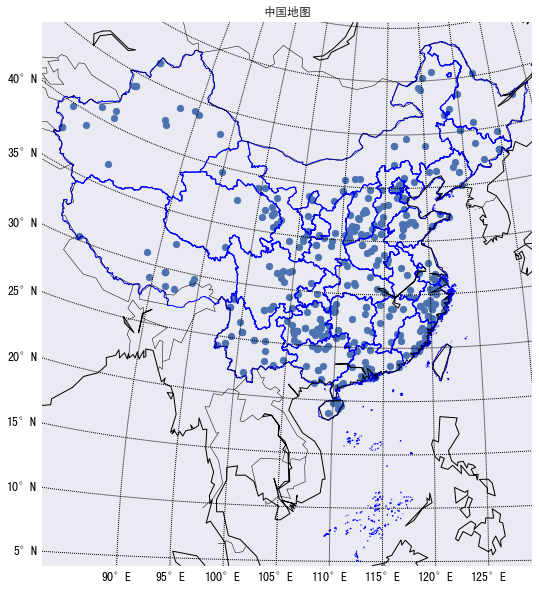

In [6]:
fig = plt.figure(figsize=(15,10))
ax1 =fig.gca()
#Basemap基础设置，选取经纬度范围
bmap = Basemap(llcrnrlon=83,llcrnrlat=3.86,urcrnrlon=138.2,urcrnrlat=53.55,
            projection='cass',lat_0=39.54,lon_0=116.23, ax=ax1)
#读取shape文件，要求.shp,.shx,.dbf位于同一个文件夹
#.shp — 图形格式，用于保存元素的几何实体。
#.shx — 图形索引格式。几何体位置索引，记录每一个几何体在shp文件之中的位置，能够加快向前或向后搜索一个几何体的效率。
#.dbf — 属性数据格式，以dBase IV的数据表格式存储每个几何形状的属性数据。
#province_info,存储dbf文件中的属性信息，province存储地图投影坐标系中每个几何体的顶点数据

bmap.readshapefile(r'border\administration_division_province_cn','province',linewidth=1,color="b")#读取省数据
#bmap.readshapefile(r'border\administration_division_city_cn','city')#读取城市数据
#shp_info = bmap.readshapefile(r'administration_division_district_cn','district')#读取区数据

#筛选区域
#for info, shp in zip(bmap.states_info, bmap.states):
#    proid = info['province']
#    if proid == '福建省':
#   poly = Polygon(shp,facecolor='w',edgecolor='k', lw=1)
#  ax1.add_patch(poly)
        
#bmap.drawmapboundary(fill_color="#ddaa66") #绘制地图边界     
#bmap.fillcontinents(color="#ddaa66",lake_color="aqua") #填充大陆
bmap.drawcoastlines() #绘制海岸线
bmap.drawcountries() #绘制国家线

bmap.drawparallels(np.arange(-10,60,5),labels=[1,0,0,0]) #绘制平行线，平行于纬度线
bmap.drawmeridians(np.arange(90,140,5),labels=[0,0,0,1]) #绘制本初子午线的平行线，平行于经度线
x,y=bmap(heritage.longtitude.values,heritage.latitude.values)
bmap.scatter(x,y)
plt.title('中国地图')
#plt.savefig('fig_province.png', dpi=100, bbox_inches='tight') #图片保存，bbox_inchws=“tight”，删除空白页面
plt.show()

fig=plt.figure(figsize=(20,15))
ax1=fig.gca()
bmap1 = Basemap(llcrnrlon=83,llcrnrlat=3.86,urcrnrlon=138.2,urcrnrlat=53.55,
            projection='cass',lat_0=39.54,lon_0=116.23, ax=ax1)
bmap1.drawcoastlines()
bmap1.readshapefile(r"border\administration_division_province_cn",'province',linewidth=1,color="b")
x1,y1=bmap1(heritage.longtitude.values,heritage.latitude.values)
map1=bmap1.hexbin(x1,y1)
bmap1.colorbar(mappable=map1,location="bottom")
#plt.colorbar()
plt.show()

fig=plt.figure(figsize=(20,15))
ax2=fig.gca()
bmap2 = Basemap(llcrnrlon=83,llcrnrlat=3.86,urcrnrlon=138.2,urcrnrlat=53.55,
            projection='cass',lat_0=39.54,lon_0=116.23, ax=ax2)
bmap2.drawcoastlines()
bmap2.readshapefile(r"border\administration_division_province_cn",'province',linewidth=1,color="b")
#x2,y2=bmap1(heritage.longtitude.values,heritage.latitude.values)
map2=bmap2.hexbin(x1,y1,gridsize=20,mincnt=1,cmap="summer")
bmap2.colorbar(mappable=map2,location="bottom")
#plt.colorbar()
plt.show()

fig=plt.figure(figsize=(20,15))
ax2=fig.gca()
bmap2 = Basemap(llcrnrlon=83,llcrnrlat=3.86,urcrnrlon=138.2,urcrnrlat=53.55,
            projection='cass',lat_0=39.54,lon_0=116.23, ax=ax2)
bmap2.drawcoastlines()
bmap2.readshapefile(r"border\administration_division_province_cn",'province',linewidth=1,color="b")
map2=bmap2.hexbin(x1,y1,gridsize=30,mincnt=1,cmap="summer")
bmap2.colorbar(mappable=map2,location="bottom")
plt.show()

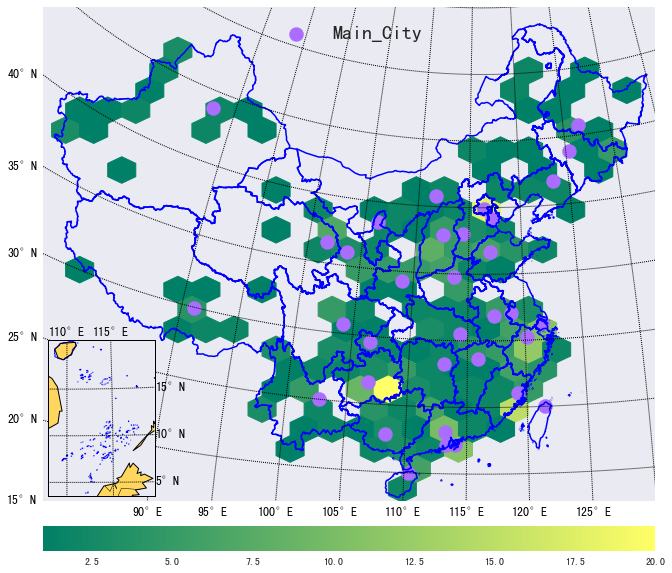

In [7]:
fig = plt.figure(figsize=(15,10))
ax1 =fig.gca()
#Basemap基础设置，选取经纬度范围
bmap = Basemap(llcrnrlon=82,llcrnrlat=15,urcrnrlon=138.2,urcrnrlat=53,
            projection='cass',lat_0=39.54,lon_0=116.23, ax=ax1)

bmap.readshapefile(r'border\administration_division_province_cn','province',linewidth=1.5,color="b")#读取省数据

#drawmapboundary(fill_color="#ddaa66") #绘制地图边界     
#bmap.fillcontinents(color="#ddaa66",lake_color="aqua") #填充大陆
#bmap.drawcoastlines() #绘制海岸线
#bmap.drawcountries() #绘制国家线

bmap.drawparallels(np.arange(-10,60,5),labels=[1,0,0,0]) #绘制平行线，平行于纬度线
bmap.drawmeridians(np.arange(90,140,5),labels=[0,0,0,1]) #绘制本初子午线的平行线，平行于经度线
x_city,y_city=bmap(city.longtitude.values,city.latitude.values)
x,y=bmap(heritage.longtitude.values,heritage.latitude.values)
map2=bmap.hexbin(x,y,gridsize=20,mincnt=1,cmap="summer")
bmap.colorbar(mappable=map2,location="bottom",pad="5%")
#bmap.scatter(x,y,marker="^",color="#ffd75f",s=100)
bmap.scatter(x_city,y_city,s=200,color="#ab6dff",label=r"Main_City")
ax1.legend(loc="upper center",fontsize="20")

axins=zoomed_inset_axes(ax1,0.7,loc=3)
#axins.set_xlim(-20,0)
#axins.set_ylim(3.18)

bmap2=Basemap(llcrnrlon=108,llcrnrlat=3.5,urcrnrlon=120,urcrnrlat=20,
      projection='cass',lat_0=10,lon_0=110, ax=axins)
bmap2.readshapefile(r'border\administration_division_province_cn','province',linewidth=1,color="b")
bmap2.drawmapboundary()
bmap2.fillcontinents(color='#ffd75f', lake_color='#7777ff')
bmap2.drawcoastlines() #绘制海岸线
bmap2.drawcountries() #绘制国家线
bmap2.drawparallels(np.arange(0,20,5),labels=[0,1,0,0]) #绘制平行线，平行于纬度线
bmap2.drawmeridians(np.arange(105,120,5),labels=[0,0,1,0]) #绘制本初子午线的平行线，平行于经度线

#plt.title('中国地图')
#plt.savefig('非物质文化遗产\fig_china_hexbin.tif', dpi=200, bbox_inches='tight') #图片保存，bbox_inchws=“tight”，删除空白页面
#plt.savefig('非物质文化遗产\fig_china_hexbin.pdf', dpi=200, bbox_inches='tight') #图片保存，bbox_inchws=“tight”，删除空白页面
#plt.savefig('fig_province.png', dpi=100, bbox_inches='tight') #图片保存，bbox_inchws=“tight”，删除空白页面
plt.show()

fig=plt.figure(figsize=(20,15))
ax2=fig.gca()
bmap2 = Basemap(llcrnrlon=83,llcrnrlat=3.86,urcrnrlon=138.2,urcrnrlat=53.55,
            projection='cass',lat_0=39.54,lon_0=116.23, ax=ax2)
bmap2.drawcoastlines()
bmap2.readshapefile(r"border\administration_division_province_cn",'province',linewidth=1.5,color="b")
map2=bmap2.hexbin(x1,y1,gridsize=30,mincnt=1,cmap="summer",linewidths=0.5,edgecolors="k")
bmap2.colorbar(mappable=map2,location="bottom")
plt.show()

### 3.非遗的民族分布特征

In [8]:
h_nationlity=heritage.copy()

In [9]:
h_nationlity.head()

,time,items,corporation,Nationality,province,city,district,township,location,Label_nationality,longtitude,latitude
0,2006,春节,中央文化部,汉族,北京市,NaN,NaN,NaN,"116.407526,39.904030",1,116.407526,39.904030
1,2006,清明节,中央文化部,汉族,北京市,NaN,NaN,NaN,"116.407526,39.904030",1,116.407526,39.904030
2,2006,端午节,中央文化部,汉族,北京市,NaN,NaN,NaN,"116.407526,39.904030",1,116.407526,39.904030
3,2006,端午节（屈原故里端午习俗）,湖北省宜昌市秭归县,汉族,湖北省,宜昌市,秭归县,[],"110.977711,30.825897",1,110.977711,30.825897
4,2006,端午节（西塞神舟会）,湖北省黄石市,汉族,湖北省,黄石市,[],[],"115.038520,30.199652",1,115.038520,30.199652


In [10]:
h_nationlity.groupby("Nationality").size().sort_values(ascending=False)

Nationality
汉族       246
苗族        25
蒙古族       18
藏族        16
彝族         8
壮族         8
维吾尔族       7
瑶族         7
侗族         7
朝鲜族        7
畲族         5
羌族         5
布依族        4
白族         4
回族         3
塔吉克族       3
土族         3
达斡尔族       3
鄂温克族       3
锡伯族        3
塔塔尔族       2
土家族        2
傣族         2
撒拉族        2
黎族         2
柯尔克孜族      2
水族         2
哈萨克族       2
珞巴族        2
裕固族        2
仡佬族        2
满族         2
傈僳族        1
俄罗斯族       1
哈尼族        1
侗族、苗族      1
仫佬族        1
朝鲜节        1
德昂族        1
怒族         1
景颇族        1
毛南族        1
独龙族        1
藏族、土族      1
赫哲族        1
鄂伦春族       1
京族         1
dtype: int64

In [11]:
h_nationlity["longtitude"]=[float(h_nationlity.location[i].split(",")[0]) for i in h_nationlity.index]
h_nationlity["latitude"]=[float(h_nationlity.location[i].split(",")[1]) for i in h_nationlity.index]

In [12]:
location_1=h_nationlity[h_nationlity.Label_nationality==1][["longtitude","latitude"]]
location_0=h_nationlity[h_nationlity.Label_nationality==0][["longtitude","latitude"]]

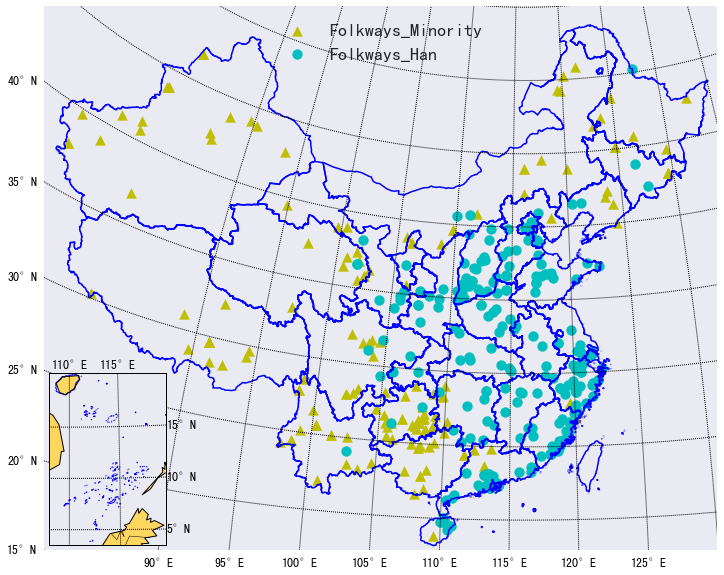

In [13]:
fig = plt.figure(figsize=(15,10))
ax1 =fig.gca()
#Basemap基础设置，选取经纬度范围
bmap = Basemap(llcrnrlon=82,llcrnrlat=15,urcrnrlon=138.2,urcrnrlat=53,
            projection='cass',lat_0=39.54,lon_0=116.23, ax=ax1)

bmap.readshapefile(r'border\administration_division_province_cn','province',linewidth=1.5,color="b")#读取省数据

#drawmapboundary(fill_color="#ddaa66") #绘制地图边界     
#bmap.fillcontinents(color="#ddaa66",lake_color="aqua") #填充大陆
#bmap.drawcoastlines() #绘制海岸线
#bmap.drawcountries() #绘制国家线

bmap.drawparallels(np.arange(-10,60,5),labels=[1,0,0,0]) #绘制平行线，平行于纬度线
bmap.drawmeridians(np.arange(90,140,5),labels=[0,0,0,1]) #绘制本初子午线的平行线，平行于经度线
#x_city,y_city=bmap(city.longtitude.values,city.latitude.values)
#bmap.scatter(x_city,y_city,s=200,alpha=0.5,color="#ab6dff",label="Main_City")


x_0,y_0=bmap(location_0.longtitude.values,location_0.latitude.values)
x_1,y_1=bmap(location_1.longtitude.values,location_1.latitude.values)
#map2=bmap2.hexbin(x1,y1,gridsize=20,mincnt=1,cmap="summer")
bmap.scatter(x_0,y_0,marker="^",color="y",s=100,label="Folkways_Minority")
bmap.scatter(x_1,y_1,color="c",s=100,label="Folkways_Han")
ax1.legend(loc="upper center",fontsize="18")

axins=zoomed_inset_axes(ax1,0.7,loc=3)
#axins.set_xlim(-20,0)
#axins.set_ylim(3.18)

bmap2=Basemap(llcrnrlon=108,llcrnrlat=3.5,urcrnrlon=120,urcrnrlat=20,
      projection='cass',lat_0=10,lon_0=110, ax=axins)
bmap2.readshapefile(r'border\administration_division_province_cn','province',linewidth=1,color="b")
bmap2.drawmapboundary()
bmap2.fillcontinents(color='#ffd75f', lake_color='#7777ff')
bmap2.drawcoastlines() #绘制海岸线
bmap2.drawcountries() #绘制国家线
bmap2.drawparallels(np.arange(0,20,5),labels=[0,1,0,0]) #绘制平行线，平行于纬度线
bmap2.drawmeridians(np.arange(105,120,5),labels=[0,0,1,0]) #绘制本初子午线的平行线，平行于经度线

#plt.title('中国地图')
#plt.savefig('fig_china.tif', dpi=200, bbox_inches='tight') #图片保存，bbox_inchws=“tight”，删除空白页面
#plt.savefig('fig_china.pdf', dpi=200, bbox_inches='tight') #图片保存，bbox_inchws=“tight”，删除空白页面
#plt.savefig('fig_province.png', dpi=100, bbox_inches='tight') #图片保存，bbox_inchws=“tight”，删除空白页面
plt.show()

fig=plt.figure(figsize=(20,15))
ax2=fig.gca()
bmap2 = Basemap(llcrnrlon=83,llcrnrlat=3.86,urcrnrlon=138.2,urcrnrlat=53.55,
            projection='cass',lat_0=39.54,lon_0=116.23, ax=ax2)
bmap2.drawcoastlines()
bmap2.readshapefile(r"border\administration_division_province_cn",'province',linewidth=1,color="b")
x_0,y_0=bmap2(location_0.longtitude.values,location_0.latitude.values)
x_1,y_1=bmap2(location_1.longtitude.values,location_1.latitude.values)
map2=bmap2.hexbin(x1,y1,gridsize=20,mincnt=1,cmap="summer")
bmap2.scatter(x_0,y_0,marker="^",color="y")
bmap2.scatter(x_1,y_1,color="c")
bmap2.colorbar(mappable=map2,location="bottom")
plt.show()

writer = pd.ExcelWriter(r"非物质文化遗产\非遗名录-汇总.xlsx")
h_nationlity.to_excel(writer,'all')
writer.save()

### 4.民俗区域分布的时序性

In [14]:
h_nationlity.head()

,time,items,corporation,Nationality,province,city,district,township,location,Label_nationality,longtitude,latitude
0,2006,春节,中央文化部,汉族,北京市,NaN,NaN,NaN,"116.407526,39.904030",1,116.407526,39.904030
1,2006,清明节,中央文化部,汉族,北京市,NaN,NaN,NaN,"116.407526,39.904030",1,116.407526,39.904030
2,2006,端午节,中央文化部,汉族,北京市,NaN,NaN,NaN,"116.407526,39.904030",1,116.407526,39.904030
3,2006,端午节（屈原故里端午习俗）,湖北省宜昌市秭归县,汉族,湖北省,宜昌市,秭归县,[],"110.977711,30.825897",1,110.977711,30.825897
4,2006,端午节（西塞神舟会）,湖北省黄石市,汉族,湖北省,黄石市,[],[],"115.038520,30.199652",1,115.038520,30.199652


In [15]:
import sys
path=r"F:\Diverse\statistics\python数据分析\Slope-chart\Slope-master"
sys.path.append(path)

In [16]:
from plotSlope import slope

In [17]:
data=pd.pivot_table(h_nationlity,values="Label_nationality",index="province",columns="time",aggfunc="count",fill_value=0)

In [18]:
data.head()

time,2006,2008,2011,2014
province,,,,
上海市,1,1,1,0
云南省,9,3,2,5
内蒙古自治区,6,4,2,5
北京市,9,5,0,1
吉林省,1,5,4,0


In [19]:
h_nationlity.head()

,time,items,corporation,Nationality,province,city,district,township,location,Label_nationality,longtitude,latitude
0,2006,春节,中央文化部,汉族,北京市,NaN,NaN,NaN,"116.407526,39.904030",1,116.407526,39.904030
1,2006,清明节,中央文化部,汉族,北京市,NaN,NaN,NaN,"116.407526,39.904030",1,116.407526,39.904030
2,2006,端午节,中央文化部,汉族,北京市,NaN,NaN,NaN,"116.407526,39.904030",1,116.407526,39.904030
3,2006,端午节（屈原故里端午习俗）,湖北省宜昌市秭归县,汉族,湖北省,宜昌市,秭归县,[],"110.977711,30.825897",1,110.977711,30.825897
4,2006,端午节（西塞神舟会）,湖北省黄石市,汉族,湖北省,黄石市,[],[],"115.038520,30.199652",1,115.038520,30.199652


In [20]:
time_group=h_nationlity.groupby("time")
time_group.size()

time
2006    121
2008    134
2011     89
2014     80
dtype: int64

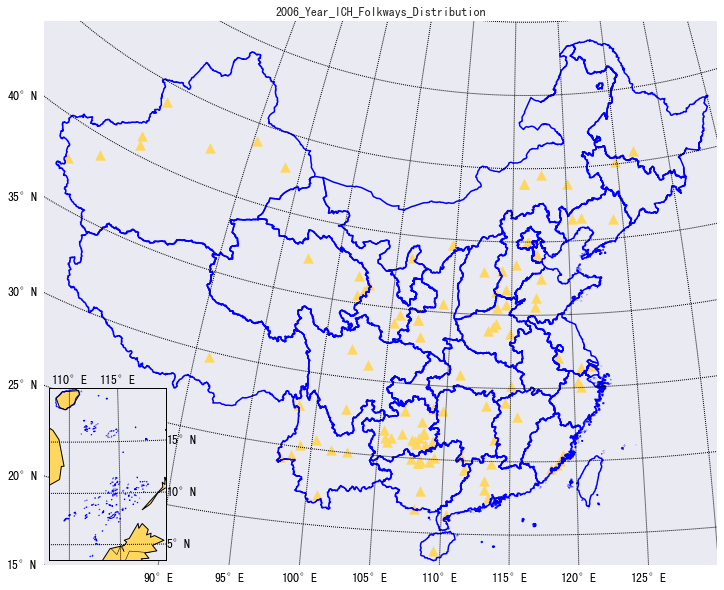

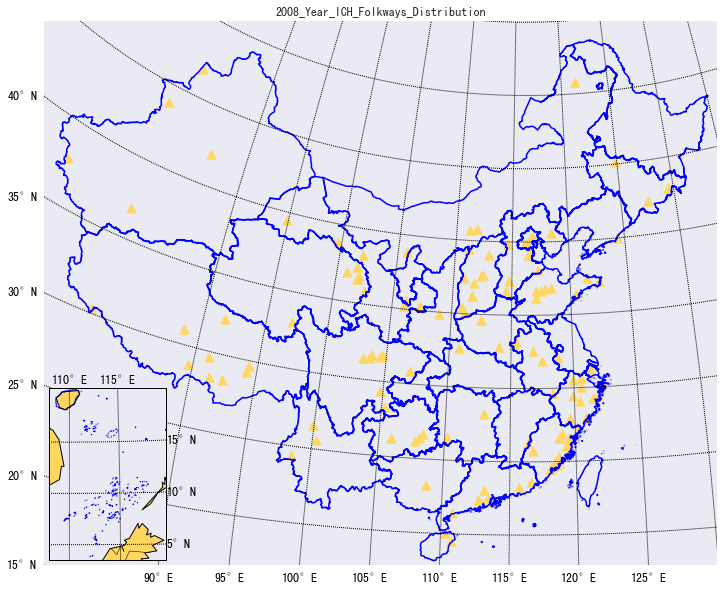

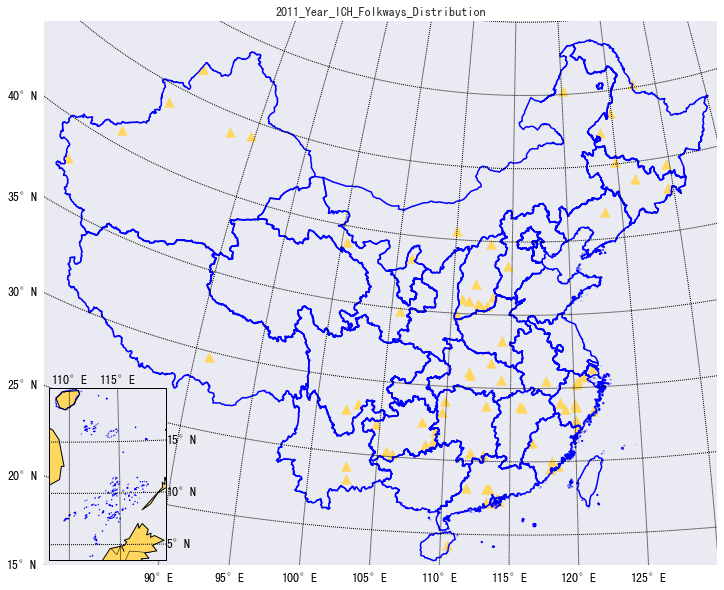

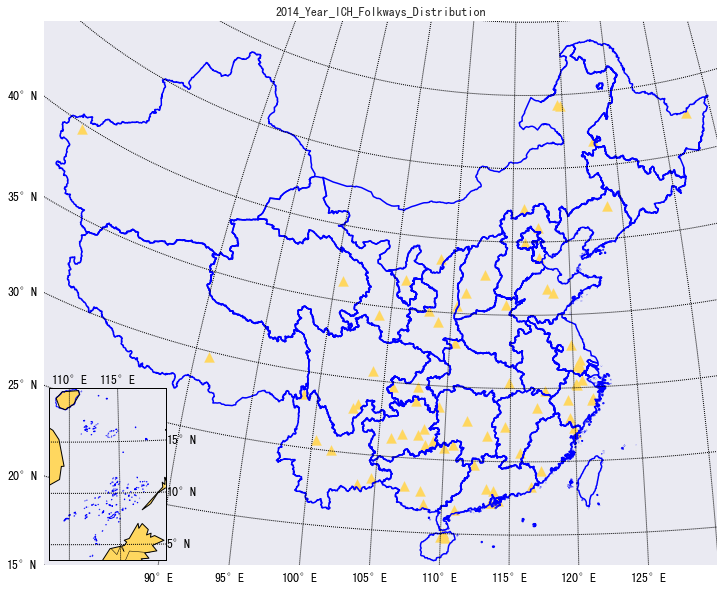

In [21]:
for name,group in time_group:
    fig = plt.figure(figsize=(15,10))
    ax1 =fig.gca()
    ax1.set_title(str(name)+"_Year"+"_ICH_Folkways_Distribution")
#Basemap基础设置，选取经纬度范围
    bmap = Basemap(llcrnrlon=82,llcrnrlat=15,urcrnrlon=138.2,urcrnrlat=53,
            projection='cass',lat_0=39.54,lon_0=116.23, ax=ax1)

    bmap.readshapefile(r'border\administration_division_province_cn','province',linewidth=1.5,color="b")#读取省数据

#drawmapboundary(fill_color="#ddaa66") #绘制地图边界     
#bmap.fillcontinents(color="#ddaa66",lake_color="aqua") #填充大陆
#bmap.drawcoastlines() #绘制海岸线
#bmap.drawcountries() #绘制国家线

    bmap.drawparallels(np.arange(-10,60,5),labels=[1,0,0,0]) #绘制平行线，平行于纬度线
    bmap.drawmeridians(np.arange(90,140,5),labels=[0,0,0,1]) #绘制本初子午线的平行线，平行于经度线
    x_0,y_0=bmap(group.longtitude.values,group.latitude.values)
    bmap.scatter(x_0,y_0,marker="^",color="#ffd75f",s=100)
    
    axins=zoomed_inset_axes(ax1,0.7,loc=3)
#axins.set_xlim(-20,0)
#axins.set_ylim(3.18)

    bmap2=Basemap(llcrnrlon=108,llcrnrlat=3.5,urcrnrlon=120,urcrnrlat=20,
      projection='cass',lat_0=10,lon_0=110, ax=axins)
    bmap2.readshapefile(r'border\administration_division_province_cn','province',linewidth=1,color="b")
    bmap2.drawmapboundary()
    bmap2.fillcontinents(color='#ffd75f', lake_color='#7777ff')
    bmap2.drawcoastlines() #绘制海岸线
    bmap2.drawcountries() #绘制国家线
    bmap2.drawparallels(np.arange(0,20,5),labels=[0,1,0,0]) #绘制平行线，平行于纬度线
    bmap2.drawmeridians(np.arange(105,120,5),labels=[0,0,1,0]) #绘制本初子午线的平行线，平行于经度线
#plt.title('中国地图')
   # plt.savefig(str(name)+'fig_china.tif', dpi=200, bbox_inches='tight') #图片保存，bbox_inchws=“tight”，删除空白页面
    #plt.savefig(str(name)+'fig_china.pdf', dpi=200, bbox_inches='tight') #图片保存，bbox_inchws=“tight”，删除空白页面
#plt.savefig('fig_province.png', dpi=100, bbox_inches='tight') #图片保存，bbox_inchws=“tight”，删除空白页面
    plt.show()

In [22]:
province_group=h_nationlity.groupby("province")
province=province_group.size().sort_values(ascending=False)

In [23]:
province=pd.DataFrame(province,columns=["value"])

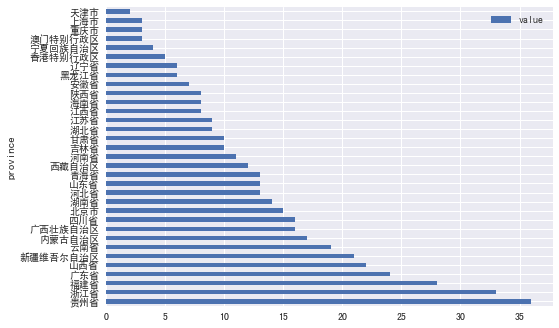

In [24]:
province.plot(kind="barh")
plt.show()

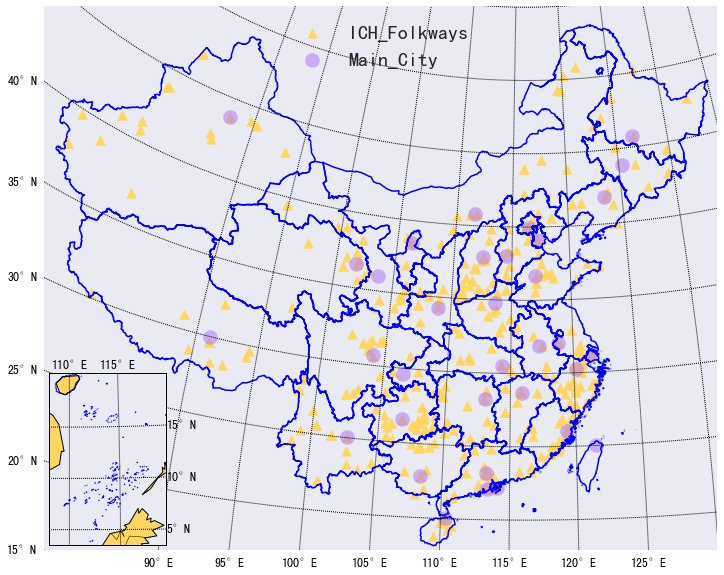

In [25]:
fig = plt.figure(figsize=(15,10))
ax1 =fig.gca()
#Basemap基础设置，选取经纬度范围
bmap = Basemap(llcrnrlon=82,llcrnrlat=15,urcrnrlon=138.2,urcrnrlat=53,
            projection='cass',lat_0=39.54,lon_0=116.23, ax=ax1)

bmap.readshapefile(r'border\administration_division_province_cn','province',linewidth=1.5,color="b")#读取省数据

#drawmapboundary(fill_color="#ddaa66") #绘制地图边界     
#bmap.fillcontinents(color="#ddaa66",lake_color="aqua") #填充大陆
#bmap.drawcoastlines() #绘制海岸线
#bmap.drawcountries() #绘制国家线

bmap.drawparallels(np.arange(-10,60,5),labels=[1,0,0,0]) #绘制平行线，平行于纬度线
bmap.drawmeridians(np.arange(90,140,5),labels=[0,0,0,1]) #绘制本初子午线的平行线，平行于经度线
x_city,y_city=bmap(city.longtitude.values,city.latitude.values)
x,y=bmap(heritage.longtitude.values,heritage.latitude.values)
bmap.scatter(x,y,marker="^",color="#ffd75f",s=100,label="ICH_Folkways")
bmap.scatter(x_city,y_city,s=200,alpha=0.5,color="#ab6dff",label=r"Main_City")
ax1.legend(loc="upper center",fontsize="20")
axins=zoomed_inset_axes(ax1,0.7,loc=3)
#axins.set_xlim(-20,0)
#axins.set_ylim(3.18)

bmap2=Basemap(llcrnrlon=108,llcrnrlat=3.5,urcrnrlon=120,urcrnrlat=20,
      projection='cass',lat_0=10,lon_0=110, ax=axins)
bmap2.readshapefile(r'border\administration_division_province_cn','province',linewidth=1,color="b")
bmap2.drawmapboundary()
bmap2.fillcontinents(color='#ffd75f', lake_color='#7777ff')
bmap2.drawcoastlines() #绘制海岸线
bmap2.drawcountries() #绘制国家线
bmap2.drawparallels(np.arange(0,20,5),labels=[0,1,0,0]) #绘制平行线，平行于纬度线
bmap2.drawmeridians(np.arange(105,120,5),labels=[0,0,1,0]) #绘制本初子午线的平行线，平行于经度线

#plt.title('中国地图')
#plt.savefig('fig_china.tif', dpi=200, bbox_inches='tight') #图片保存，bbox_inchws=“tight”，删除空白页面
#plt.savefig('fig_china.pdf', dpi=200, bbox_inches='tight') #图片保存，bbox_inchws=“tight”，删除空白页面
#plt.savefig('fig_province.png', dpi=100, bbox_inches='tight') #图片保存，bbox_inchws=“tight”，删除空白页面
plt.show()

In [26]:
h_nationlity.head()

,time,items,corporation,Nationality,province,city,district,township,location,Label_nationality,longtitude,latitude
0,2006,春节,中央文化部,汉族,北京市,NaN,NaN,NaN,"116.407526,39.904030",1,116.407526,39.904030
1,2006,清明节,中央文化部,汉族,北京市,NaN,NaN,NaN,"116.407526,39.904030",1,116.407526,39.904030
2,2006,端午节,中央文化部,汉族,北京市,NaN,NaN,NaN,"116.407526,39.904030",1,116.407526,39.904030
3,2006,端午节（屈原故里端午习俗）,湖北省宜昌市秭归县,汉族,湖北省,宜昌市,秭归县,[],"110.977711,30.825897",1,110.977711,30.825897
4,2006,端午节（西塞神舟会）,湖北省黄石市,汉族,湖北省,黄石市,[],[],"115.038520,30.199652",1,115.038520,30.199652


In [27]:
nationality=h_nationlity.groupby("Nationality").size().sort_values(ascending=False)

In [28]:
province=h_nationlity.groupby("province").size().sort_values(ascending=False)

In [30]:
h_nationlity.shape

(424, 12)